In [1]:
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalize(minimum, maximum, value):
    norm_value = (value - minimum) / (maximum - minimum)
    return norm_value

In [3]:
def rgb(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value-minimum) / (maximum - minimum)
    
    b = int(max(0, 255*(1 - ratio)))
    b = normalize(0, 255, b)
    
    r = int(max(0, 255*(ratio - 1)))
    r = normalize(0, 255, r)
    
    g = 255 - b - r
    g = normalize(0, 255, g)
    
    return r, g, b

### plt.scatter(0, 0, s=200, color=xxx);

In [5]:
filename = 'envir_hist.h5'

In [6]:
with h5py.File(filename, 'r') as f:
    a_group_key = list(f.keys())[0]
    
    # Get the data
    data = list(f[a_group_key])

In [7]:
dmin = np.min(data)
dmax = np.max(data)

In [ ]:
dmin, dmax

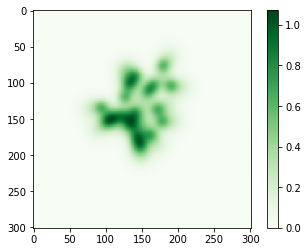

In [10]:
plt.imshow(data[4999], cmap="Greens")
plt.colorbar()

In [11]:
# Save x and y
x = data[100][::,0]
y = data[100][::,1]

c = np.savetxt('array.txt', (x, y))  

In [12]:
np.savetxt("array.txt", data[100], fmt="%s")

In [ ]:
data[100].shape

In [ ]:
data[100][100][100]

# Save maps as txt for C

In [5]:
with h5py.File(filename, 'r') as f:
    a_group_key = list(f.keys())[0]
    
    # Get the data
    data = list(f[a_group_key])

NameError: name 'filename' is not defined

In [14]:
data[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
time = len(data)
stepsize = 1
for t in range(2560, time):
    if t % stepsize == 0:
        np.savetxt(f"timestep_{t}.txt", data[t], fmt="%s")

KeyboardInterrupt: 

In [16]:
time = len(data)
stepsize = 1
for t in range(time):
#     if t % 1000 == 0:
    np.savetxt(f"concentrationMaps/timestep_{t}.txt", data[t], fmt="%s")

# Preprocess position data

3 arrays?
- Over time, list of xy positions -> 5000 lines, each line a txt file, each file has x's then y's
- Over time, list of direction
- Over time, list of positions of scenting bees

In [6]:
filename_2 = 'bee_hist.h5'

In [7]:
bee_data = {}
with h5py.File(filename_2, 'r') as infile:
    for key, val in infile.items():
        bee_data[key] = np.array(val)

In [8]:
bee_data

{'bee_i': array([ 0,  1,  2, ..., 19, 10, 11]),
 'concentration': array([0.00000000e+00, 0.00000000e+00, 1.04257317e-02, ...,
        6.17335079e-01, 1.39811166e+01, 1.65159953e+01]),
 'distance_from_queen': array([0.63377928, 0.69354588, 0.20994334, ..., 0.20283464, 0.33454493,
        0.21431168]),
 'state': array([0, 0, 0, ..., 1, 1, 1]),
 't': array([   0,    0,    0, ..., 4999, 4999, 4999]),
 'threshold_met': array([False, False,  True, ...,  True,  True,  True]),
 'wx': array([ 0.        ,  0.        , -0.59802294, ..., -0.31180657,
         0.38237147,  0.1122637 ]),
 'wy': array([ 0.        ,  0.        , -0.80147898, ..., -0.9501456 ,
        -0.92400869,  0.99367845]),
 'x': array([ 0.34219808, -0.4776199 , -0.12555094, ..., -0.15917228,
        -0.29376878, -0.04080362]),
 'y': array([-0.53345726, -0.50287685, -0.16826518, ..., -0.12572222,
        -0.16006316,  0.21039145])}

In [15]:
times = np.unique(bee_data['t'])
for t in times:
    sys.stdout.write(f'\rTime: {t}')
    sys.stdout.flush()
    idxs = np.where(bee_data['t']==t)
    x_positions = bee_data['x'][idxs]
    y_positions = bee_data['y'][idxs]
    bee_state = bee_data['state'][idxs]
    
    x_orientation = -bee_data['wx'][idxs]
    y_orientation = -bee_data['wy'][idxs]
#     bee_orientation = np.arctan(y_orientation / (x_orientation + 0.000001))
    bee_orientation = np.arctan2(y_orientation, x_orientation)
    bee_orientation = np.rad2deg(bee_orientation) % 360
    
    pos_data = np.array([x_positions, y_positions, bee_state, bee_orientation]).T
    np.savetxt(f"positionArrays/timestep_{t}.txt", pos_data, fmt="%s")
    
#     break

Time: 4999

In [38]:
xx = np.arctan(y_orientation / x_orientation + 0.000001)
np.rad2deg(xx).astype(int)

array([ 82,  38, -53,  87,  36,  53, -28,  -7,   6,  47,  39, -37,  83,
       -40,  24, -48, -65,   0,  -6, -41,  73,   8,  71, -67,  83])

In [42]:
pos_data

array([[-0.21695467, -0.23659902,  1.        ],
       [-0.27902983, -0.0322076 ,  1.        ],
       [ 0.20209177, -0.61654064,  1.        ],
       [-0.10662712, -0.23425217,  1.        ],
       [ 0.13745895, -0.41498994,  1.        ],
       [ 0.03378487,  0.0975908 ,  1.        ],
       [ 0.08728346, -0.06212465,  1.        ],
       [-0.19659044, -0.50271791,  1.        ],
       [ 0.25049803, -0.47217385,  1.        ],
       [-0.50798456, -0.12446035,  1.        ],
       [ 0.03392955, -0.49462633,  1.        ],
       [ 0.03680831, -0.37652462,  1.        ],
       [-0.08448259,  0.09858076,  1.        ],
       [ 0.10811135,  0.21292625,  1.        ],
       [ 0.25660213, -0.00693583,  1.        ],
       [-0.04788475, -0.12126411,  1.        ],
       [ 0.14380924, -0.5206088 ,  1.        ],
       [ 0.12735487,  0.03852406,  1.        ],
       [-0.41022319, -0.18071071,  1.        ],
       [-0.3764382 , -0.05783508,  1.        ],
       [-0.12929469, -0.34237571,  1.   

In [ ]:
bee_nums = np.unique(bee_data['bee_i'])
bees = {}
for bee_num in bee_nums:
    idxs = np.where(bee_data['bee_i']==bee_num)
    bee_state = bee_data['state'][idxs]
    bee_x = bee_data['x'][idxs]
    bee_y = bee_data['y'][idxs]
    bias = bee_data['wx'][idxs], bee_data['wy'][idxs]
    bees[bee_num] = {'x': bee_x, 'y': bee_y, 'bias': bias, 'state': bee_state}

In [ ]:
positions = []

In [ ]:
bees